### checklist

clean myfunctions file

find the oulier discovered with standardisation

small final report on model  
name, score, graphs, metrics

try a prediction


In [59]:
# Data analysis
import pandas as pd
import numpy as np
from numpy import ravel
from scipy import stats
import mplcursors
# Plot lib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Jupyter notebook
from ipywidgets import interact, widgets
from IPython.display import display

# Sklearn
import sklearn
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import d2_absolute_error_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


# Own Functions
from scripts.functions import get_dataset
from scripts.functions import add_zipcode
from scripts.functions import add_province
from scripts.functions import add_region
from scripts.functions import set_type
from scripts.functions import set_feat_target
from scripts.functions import regline

import sys

# Ensure that import from parent directory is correctly implemented
sys.path.append("..")
from scripts.colors import bcolors as bc


<H1 style= "color:white; background-color:darkgrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Modeling</H1>


<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Data Cleaning</H2>


- Load datas from csv file
- Explore dataset


In [60]:
# Load the datas
file = "../datas/Immoweb_data_ok_maite.csv"
data = get_dataset(file)
data.head()
# data.dtypes


,Id,Locality,House or appartment?,Subtype,Price,Type of sale,Number of rooms,Living area,Fully equipped kitchen,Furnished,Open fire,Terrace,Area of terrace,Garden,Area of garden,Land surface,Number of facades,Swimming pool,State of building
0,10233388,Uccle,HOUSE,HOUSE,1295000.0,BUY_REGULAR,4.0,290.0,1,None,0,1,15,None,None,230,2,0,GOOD
2,10310451,Anderlecht,APARTMENT,APARTMENT,357500.0,BUY_REGULAR,3.0,119.0,0,None,0,1,16,None,None,None,4,None,NaN
3,10309870,Uccle,APARTMENT,APARTMENT,295000.0,BUY_REGULAR,2.0,140.0,0,None,0,None,None,None,None,None,2,None,TO_BE_DONE_UP
4,10309546,Uccle,APARTMENT,APARTMENT,199000.0,BUY_REGULAR,1.0,61.0,0,None,0,1,2,None,None,None,2,None,NaN
5,10308639,Berchem-Sainte-Agathe,HOUSE,HOUSE,485000.0,BUY_REGULAR,3.0,235.0,0,None,0,None,None,1,100,200,2,0,TO_BE_DONE_UP


In [61]:
# data[data['Number of rooms'] >7]
# data.isnull().sum()
# data['Subtype'].unique()
data.dtypes
# data.describe()


Id                          int64
Locality                   object
House or appartment?       object
Subtype                    object
Price                     float64
Type of sale               object
Number of rooms           float64
Living area               float64
Fully equipped kitchen     object
Furnished                  object
Open fire                   int64
Terrace                    object
Area of terrace            object
Garden                     object
Area of garden             object
Land surface               object
Number of facades          object
Swimming pool              object
State of building          object
dtype: object

- Adding zip code information to the dataset
- Adding province information to the dataset
- Adding region information to the dataset


In [62]:
# Add zipcode column
zip_path = "../datas/Postal_codes.csv"
data = add_zipcode(zip_path, data)

# Add Province column
data = add_province(data)

# Add Region column
data = add_region(data)

# Explore data
data.head()
# data.dtypes
# data.isnull().sum()
# data['Subtype'].unique()
# data.dtypes


,Id,Locality,House or appartment?,Subtype,Price,Type of sale,Number of rooms,Living area,Fully equipped kitchen,Furnished,...,Area of terrace,Garden,Area of garden,Land surface,Number of facades,Swimming pool,State of building,zip_code,Province,Region
0,10233388,uccle,HOUSE,HOUSE,1295000.0,BUY_REGULAR,4.0,290.0,1,None,...,15,None,None,230,2,0,GOOD,1180.0,Bruxelles,Brux
2,10310451,anderlecht,APARTMENT,APARTMENT,357500.0,BUY_REGULAR,3.0,119.0,0,None,...,16,None,None,None,4,None,NaN,1070.0,Bruxelles,Brux
3,10309870,uccle,APARTMENT,APARTMENT,295000.0,BUY_REGULAR,2.0,140.0,0,None,...,None,None,None,None,2,None,TO_BE_DONE_UP,1180.0,Bruxelles,Brux
4,10309546,uccle,APARTMENT,APARTMENT,199000.0,BUY_REGULAR,1.0,61.0,0,None,...,2,None,None,None,2,None,NaN,1180.0,Bruxelles,Brux
5,10308639,berchem-sainte-agathe,HOUSE,HOUSE,485000.0,BUY_REGULAR,3.0,235.0,0,None,...,None,1,100,200,2,0,TO_BE_DONE_UP,1082.0,Bruxelles,Brux


- Data cleaning
- Ensure data types are correct


In [63]:
# Clean and set column type
data = set_type(data)


In [64]:
# Explore datas
# print(data.info())
# print(data.describe())
# print(data['Region'].value_counts())
# print(data['Number of rooms'].value_counts())
# data['Number of facades'].unique()


<H2 style="color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Correlation</H2>


- Correlation Matrix using Seaborn


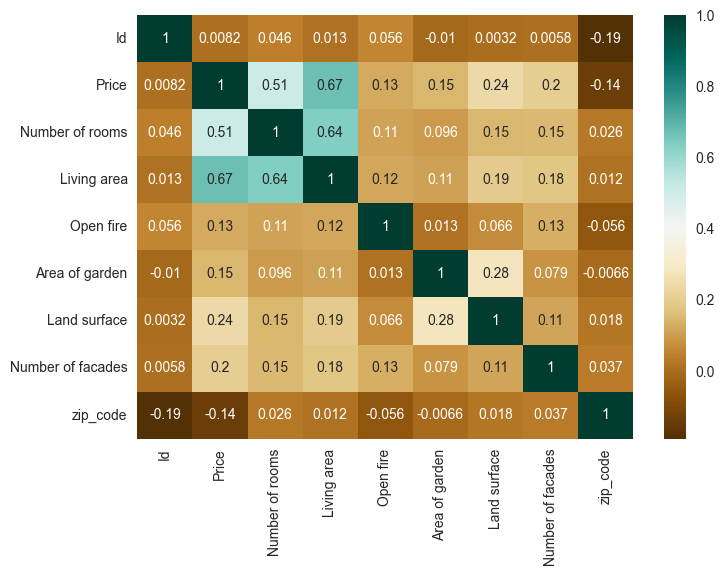

In [65]:
correlation = data.corr(numeric_only=True)
dataplot = sns.heatmap(correlation, cmap="BrBG", annot=True)


- Sort correlation to Price


Text(0.5, 1.0, 'Correlation to Price')

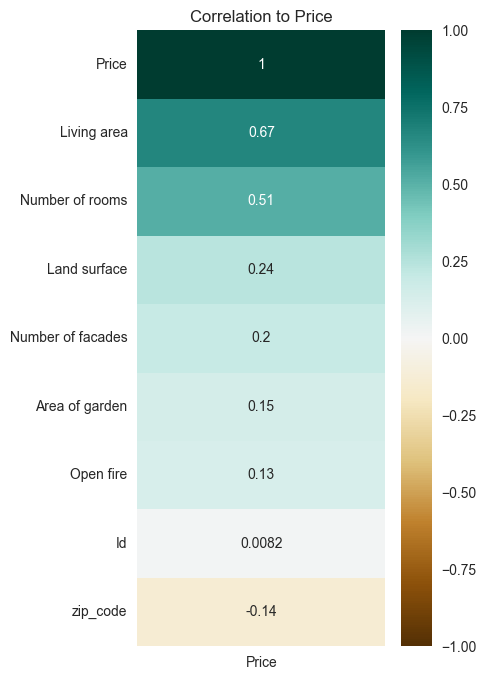

In [66]:
fig, ax = plt.subplots(figsize=(4, 8))
heatmap = sns.heatmap(
    correlation[["Price"]].sort_values(by="Price", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
)
heatmap.set_title("Correlation to Price")


<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Explore data outliers</H2>


- Visualisation of outliers using boxplot from Seaborn


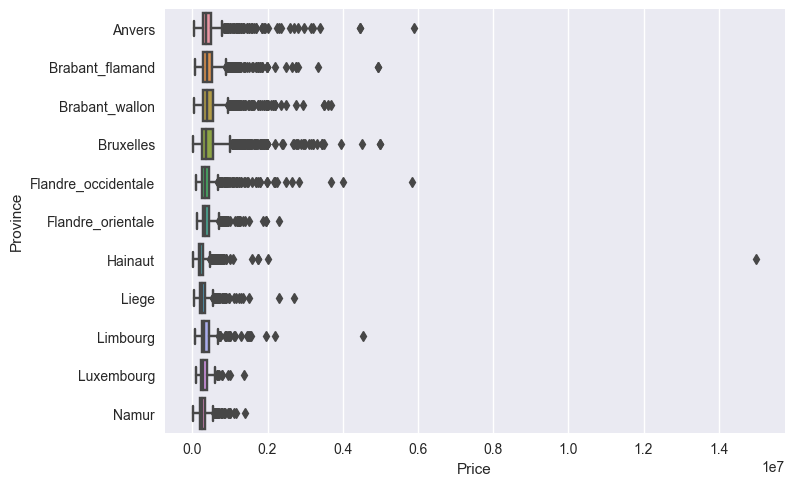

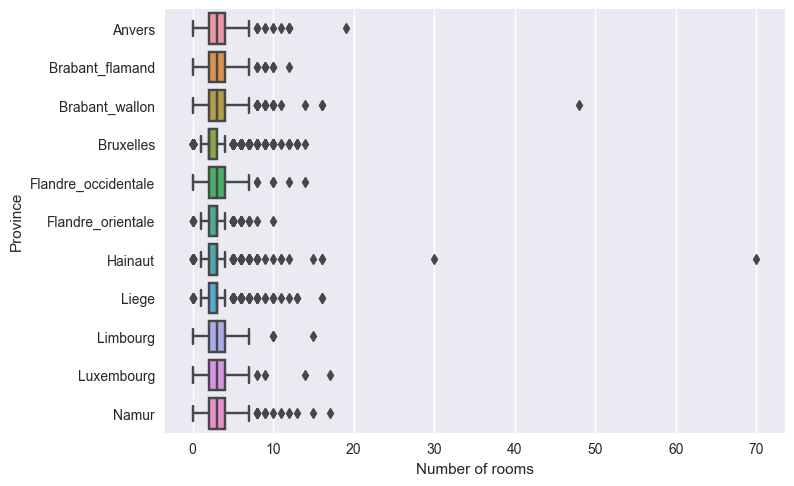

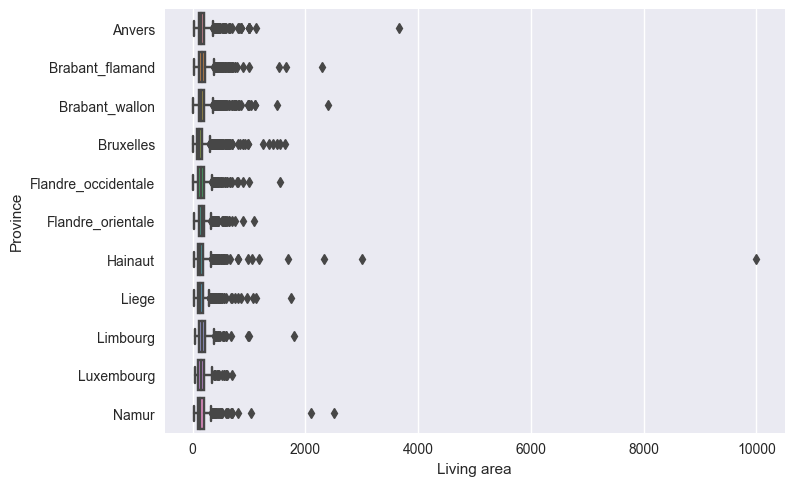

In [67]:
plt.figure()
outliers_Price = sns.boxplot(data=data, x="Price", y="Province")
plt.figure()
outliers_Number_of_rooms = sns.boxplot(data=data, x="Number of rooms", y="Province")
plt.figure()
outliers_Living_area = sns.boxplot(data=data, x="Living area", y="Province")
# sns.close()


<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Remove outliers</H2>


In [68]:
# print(data['Price'].describe())

# Remove outliers from Price column
q1_price, q3_price = data["Price"].quantile([0.25, 0.75])
iqr_price = q3_price - q1_price
print(q1_price, q3_price, iqr_price)
iqr_coef = 1.5
data = data[
    (data["Price"] > (q1_price - (iqr_coef * iqr_price)))
    & (data["Price"] < (q3_price + (iqr_coef * iqr_price)))
]
# print(data['Price'].describe())

# Remove outliers from Living area column
print(data["Living area"].describe())
q1_la, q3_la = data["Living area"].quantile([0.25, 0.75])
iqr_price = q3_la - q1_la
print(q1_la, q3_la, iqr_price)
iqr_coef = 1.5
data = data[
    (data["Living area"] > (q1_la - (iqr_coef * iqr_price)))
    & (data["Living area"] < (q3_la + (iqr_coef * iqr_price)))
]
# print(data['Living area'].describe())

# Remove outliers from Number of rooms column
# print(data['Number of rooms'].describe())
# q1_nr , q3_nr = data['Number of rooms'].quantile([0.25,0.75])
# iqr_price = q3_nr - q1_nr
# print(q1_nr, q3_nr, iqr_price)
# iqr_coef = 5
# data = data[(data['Number of rooms'] > (q1_nr - (iqr_coef*iqr_price))) & (data['Number of rooms'] < (q3_nr + (iqr_coef*iqr_price)))]
data = data[(data["Number of rooms"] > 0) & (data["Number of rooms"] < 20)]
# print(data['Number of rooms'].describe())

plt.show()


249000.0 471997.0 222997.0
count    9208.000000
mean      153.805712
std        99.581505
min         1.000000
25%        96.000000
50%       135.000000
75%       185.000000
max      3665.000000
Name: Living area, dtype: float64
96.0 185.0 89.0


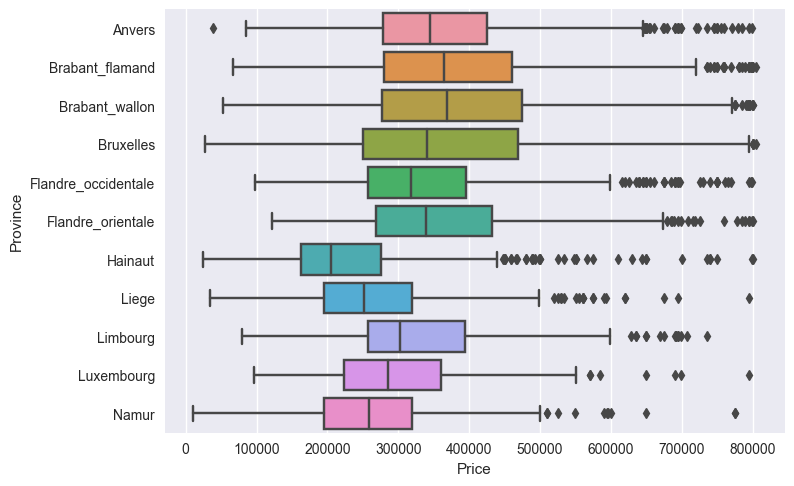

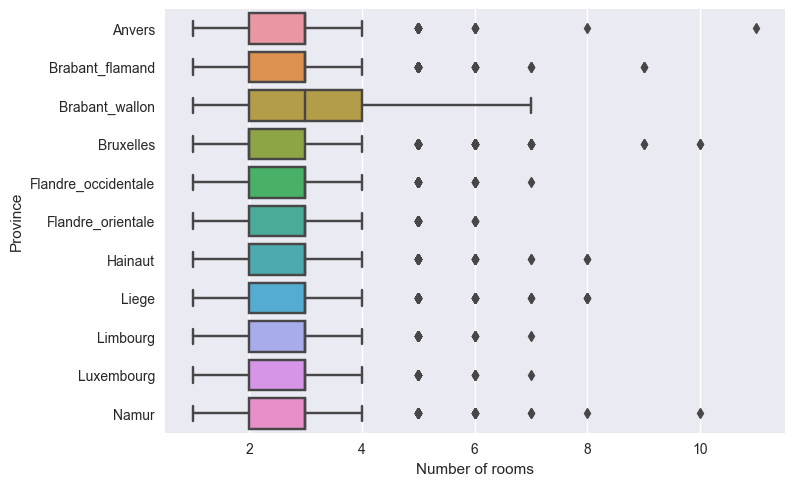

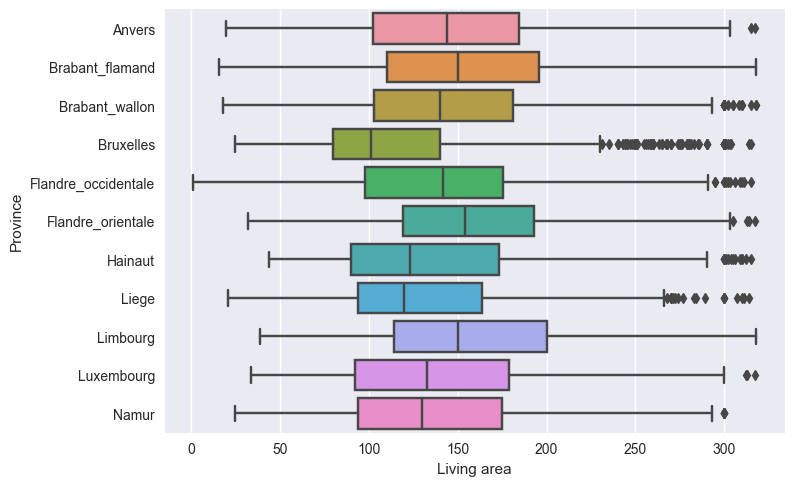

In [69]:
plt.figure()
outliers_removed_Price = sns.boxplot(data=data, x="Price", y="Province")
plt.figure()
outliers_removed_Number_of_rooms = sns.boxplot(
    data=data, x="Number of rooms", y="Province"
)
plt.figure()
outliers_removed_Living_area = sns.boxplot(data=data, x="Living area", y="Province")
# sns.close()


<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Select target (HOUSES prices) and features from the dataframe</H2>


- Slice df for modeling
- Categorical to numerical
- Split feature, target
- Split train, test
- Normalize or standardise


In [70]:
# Select columns for modeling
# print(data.columns)
data_model_house = data[data["House or appartment?"] == "HOUSE"][
    [
        "Price",
        "Province",
        "Living area",
        "Number of rooms",
        "Number of facades",
        "Subtype",
        "State of building",
        "Land surface",
        "Area of garden",
    ]
]
# print(data_model_house.head())
# print(data_model_house.shape[0])

# Get dummies for Categorical columns
data_model_house = pd.get_dummies(
    data_model_house, columns=["Province"], drop_first=False
)
data_model_house = pd.get_dummies(
    data_model_house, columns=["Subtype"], drop_first=False
)
data_model_house = pd.get_dummies(
    data_model_house, columns=["State of building"], drop_first=False
)
# print(data_model_house.columns)
print(f"Number of rows fitted in the model : {data_model_house.shape[0]}")
print(f"Number of rows fitted in the model : {data_model_house.columns}")

# Split features, target
X, y = set_feat_target(data_model_house)

# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=67
)
print(X_test[0])

Number of rows fitted in the model : 5013
Number of rows fitted in the model : Index(['Price', 'Living area', 'Number of rooms', 'Number of facades',
       'Land surface', 'Area of garden', 'Province_Anvers',
       'Province_Brabant_flamand', 'Province_Brabant_wallon',
       'Province_Bruxelles', 'Province_Flandre_occidentale',
       'Province_Flandre_orientale', 'Province_Hainaut', 'Province_Liege',
       'Province_Limbourg', 'Province_Luxembourg', 'Province_Namur',
       'Subtype_APARTMENT', 'Subtype_APARTMENT_BLOCK', 'Subtype_BUNGALOW',
       'Subtype_CASTLE', 'Subtype_CHALET', 'Subtype_COUNTRY_COTTAGE',
       'Subtype_DUPLEX', 'Subtype_EXCEPTIONAL_PROPERTY', 'Subtype_FARMHOUSE',
       'Subtype_FLAT_STUDIO', 'Subtype_GROUND_FLOOR', 'Subtype_HOUSE',
       'Subtype_KOT', 'Subtype_LOFT', 'Subtype_MANOR_HOUSE', 'Subtype_MANSION',
       'Subtype_MIXED_USE_BUILDING', 'Subtype_OTHER_PROPERTY',
       'Subtype_PAVILION', 'Subtype_PENTHOUSE', 'Subtype_SERVICE_FLAT',
       'Subtyp

In [71]:
# Standardisation
# sc = StandardScaler()
# sc = Normalizer()
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# print(f"y head : {y[:1,:]},\nX head : {X[:1,:]}")
# print(f"y_test first : {y_test[:1,:]},\nX_test first : {X_test[:1,:]}")

<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Linear Regression</H2>

- Instanciate linear regression
- Fit the model and get score
- Test the model and get score


In [72]:
# Model instanciation
regressor = linear_model.LinearRegression()
# regressor = GradientBoostingRegressor()

# Train the model
if type(regressor) == sklearn.ensemble._gb.GradientBoostingRegressor:
    regressor.fit(X_train, ravel(y_train))
    reg_params = regressor.get_params()
else:
    regressor.fit(X_train, (y_train))
    print(
        f"REGRESSOR\n {bc.OKBLUE}Intercept{bc.ENDC}: {regressor.intercept_[0]},\n {bc.OKBLUE}Coef{bc.ENDC}:{regressor.coef_[0]}"
    )

# Model accuracy (train set)
accuracy_train = round(regressor.score(X_train, y_train) * 100, 2)
print(
    f"Regressor {bc.OKBLUE}train{bc.ENDC} score R²: {bc.OKGREEN if accuracy_train > 60 else bc.WARNING if accuracy_train > 50 else bc.FAIL}{accuracy_train}{bc.ENDC} %"
)

# Model accuracy (test set)
accuracy_test = round(regressor.score(X_test, y_test) * 100, 2)
print(
    f"Regressor {bc.OKBLUE}test{bc.ENDC} score R²: {bc.OKGREEN if accuracy_test > 60 else bc.WARNING if accuracy_test > 50 else bc.FAIL}{accuracy_test}{bc.ENDC} %"
)

# Prediction
pred_test = regressor.predict(X_test)
pred_train = regressor.predict(X_train)


REGRESSOR
 Intercept: 350863.9050002564,
 Coef:[ 7.51308667e+04  1.12671179e+04  3.33887668e+04  2.88217557e+02
  3.42420232e+02  4.27164640e+04  5.90776687e+04  3.99815334e+04
  1.62168939e+05 -3.88909181e+03  2.73976273e+04 -9.94757563e+04
 -6.34677139e+04 -2.86019299e+04 -5.19414947e+04 -8.39662457e+04
 -2.91038305e-11 -1.35243193e+04 -1.02244591e+04 -8.73114914e-11
 -9.77974531e+04  1.10812019e+04  9.82254278e-11  4.87143588e+04
  6.45566708e+04  2.91038305e-11 -3.63797881e-11 -3.43872857e+04
 -1.45519152e-11  4.22915036e-11  1.56661336e+05  3.00324252e+03
 -2.37695002e+04 -3.62768711e+04 -8.68178980e+04  0.00000000e+00
  0.00000000e+00 -2.80984320e+04  0.00000000e+00  4.68794088e+04
  1.41974572e+04 -2.00278187e+04  7.56083650e+03 -4.70550944e+03
 -6.49564436e+04 -1.02218879e+05 -1.14288258e+05]
Regressor train score R²: 59.95 %
Regressor test score R²: 55.7 %


<p style="color:white; background-color:grey; text-align:center; border-radius: 10px; padding-bottom: 0.5em">Metrics</p>


In [73]:
print("Train set")
print(f"MAE: {round(mean_absolute_error(y_train, pred_train),2)} €")
print(f"MAPE : {round(mean_absolute_percentage_error(y_train, pred_train)*100,2)} %")
print(
    f"Median Absolute Error : {round(median_absolute_error(y_train, pred_train),2)} €"
)
print(f"D2 :{round(d2_absolute_error_score(y_train, pred_train),4)}")


Train set
MAE: 71987.5 €
MAPE : 23.24 %
Median Absolute Error : 53966.71 €
D2 :0.3918


In [74]:
print("Test set")
print(f"MAE: {round(mean_absolute_error(y_test, pred_test),2)} €")
print(f"MAPE : {round(mean_absolute_percentage_error(y_test, pred_test)*100,2)} %")
print(f"Median Absolute Error : {round(median_absolute_error(y_test, pred_test),2)} €")
print(f"D2 :{round(d2_absolute_error_score(y_test, pred_test),4)}")


Test set
MAE: 75397.62 €
MAPE : 27.9 %
Median Absolute Error : 59997.95 €
D2 :0.3669


<p style="color:white; background-color:grey; text-align:center; border-radius: 10px; padding-bottom: 0.5em">Cross Validation</p>


In [75]:
cv_score = cross_val_score(regressor, X, ravel(y), cv=10)
print(f"Cross validation score {cv_score}")
print(f"Mean Cross Validation Score :{np.mean(cv_score)}.")


Cross validation score [ 0.49142742  0.51179607  0.51895027 -2.36906759  0.55446381  0.59113333
  0.53906257  0.54189638  0.61102985  0.54995595]
Mean Cross Validation Score :0.25406480365570616.


<p style="color:white; background-color:grey; text-align:center; border-radius: 10px; padding-bottom: 0.5em">Plot results</p>


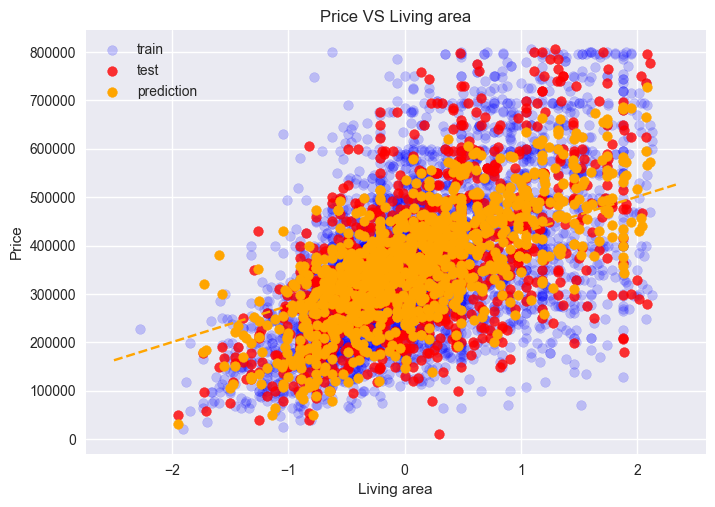

ValueError: 'point' is not a recognized unit

<Figure size 800x550 with 1 Axes>

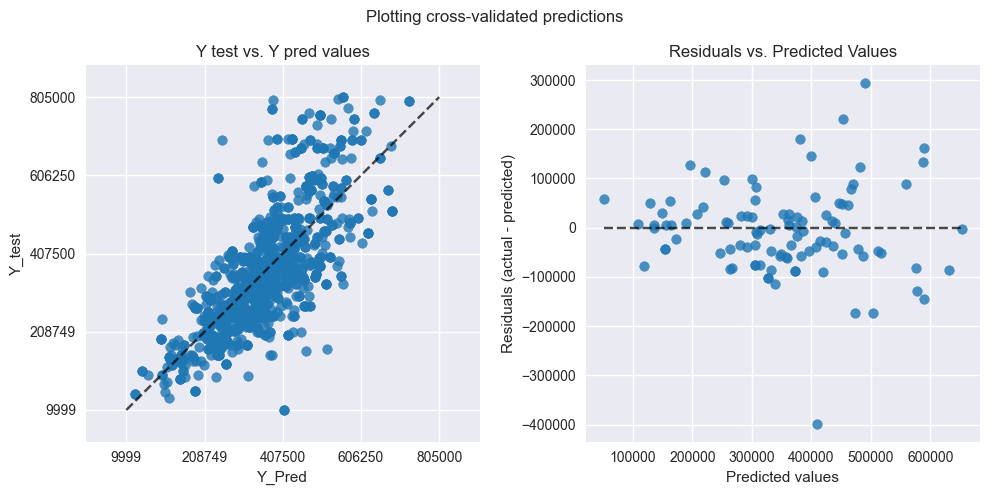

In [77]:
# X[0] = "Living Area"
# X[1] = "Number of rooms"
# X[2:] = "Province"

# Price vs Living area
# Plot the predicted values against the input values
plt.scatter(X_train[:, 0], y_train, color="blue", alpha=0.2, label="train")
# plt.scatter(X_train[:,0], pred_train, color='red')
plt.scatter(X_test[:, 0], y_test, color="red", alpha=0.8, label="test")
plt.scatter(X_test[:, 0], pred_test, color="orange", label="prediction")
if type(regressor) == sklearn.ensemble._gb.GradientBoostingRegressor:
    # plt.plot([X_test[0].min(), pred_test.min()], [X_test[0].max(), pred_test.max()], 'r', lw=2)
    pass
else:
    line_Living_area = regline(regressor.coef_[0][0], regressor.intercept_[0], "orange")

# Label the plot
plt.title("Price VS Living area")
plt.xlabel("Living area")
plt.ylabel("Price")
plt.legend(loc="upper left")

# Show the plot
plt.show()
plt.close()

# Price vs Number of rooms
# Plot the predicted values against the input values
plt.scatter(X_train[:, 1], y_train, color="blue", alpha=0.2, label="train")
# plt.scatter(X_train[:,1], pred_train, color='red')
plt.scatter(X_test[:, 1], y_test, color="red", alpha=0.8, label="test")
plt.scatter(X_test[:, 1], pred_test, color="orange", label="prediction")
# print(regressor.intercept_[0],regressor.coef_[0][1])
if type(regressor) == sklearn.ensemble._gb.GradientBoostingRegressor:
    # plt.plot([X_test[1].min(), pred_test.min()], [X_test[1].max(), pred_test.max()], 'r', lw=2)
    pass
else:
    line_Number_rooms = regline(
        regressor.coef_[0][1], regressor.intercept_[0], "orange"
    )

# Label the plot
plt.title("Price VS Number of rooms")
plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.legend(loc="upper right")

# # Annotation
# plt.annotate(
#     text='',
#     xy=(0,0),
#     xytext=(15,15),
#     textcoords='offset point',
#     bbox={'boxstyle':'round','fc':'w'},
#     arrowprops={'arrowstyle':'->'}
# ).set_visible(True)

# Show the plot
plt.show()
plt.close()

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=pred_test,
    kind="actual_vs_predicted",
    # subsample=100,
    ax=axs[0],
    # random_state=0,
)
axs[0].set_title("Y test vs. Y pred values")
axs[0].set_xlabel("Y_Pred")
axs[0].set_ylabel("Y_test")

if type(regressor) == sklearn.ensemble._gb.GradientBoostingRegressor:
    PredictionErrorDisplay.from_predictions(
        ravel(y_test),
        y_pred=pred_test,
        kind="residual_vs_predicted",
        subsample=100,
        ax=axs[1],
        random_state=0,
    )
else:
    PredictionErrorDisplay.from_predictions(
        y_test,
        y_pred=pred_test,
        kind="residual_vs_predicted",
        subsample=100,
        ax=axs[1],
        random_state=0,
    )
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()
plt.close()


<H2 style= "color:white; background-color:DimGrey; text-align:center; border-radius: 10px; padding-bottom: 0.2em">Prediction</H2>


In [ ]:
nb_rooms = widgets.BoundedFloatText(min=1, max=20, value=5, description="Rooms")
display(nb_rooms)

living_area = widgets.IntSlider(
    min=0,
    max=500,
    value=100,
    description="Living Area",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)
display(living_area)

province = widgets.Dropdown(
    options=[("Bruxelles", 1), ("Flandre", 2), ("Wallonie", 3)],
    value=1,
    description="Province",
)
display(province)


BoundedFloatText(value=5.0, description='Rooms', max=20.0, min=1.0)

IntSlider(value=100, continuous_update=False, description='Living Area', max=500)

Dropdown(description='Province', options=(('Bruxelles', 1), ('Flandre', 2), ('Wallonie', 3)), value=1)

In [ ]:
print(nb_rooms.value)
X_input = [nb_rooms.value, float(living_area.value), province.value]
print(X_input)


5.0
[5.0, 100.0, 1]
